### Problem 1 - solve the volume of a circle in $R^{10}$ using the monte carlo for high dimentions

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from random import random, randrange

In [3]:
def circle(array):

    sum_square = 0
    for value in array:
        sum_square += value**2
        
    if sum_square <= 1:
        return 1
    else:
        return 0

In [4]:
N = 1000000

array = np.zeros(10)
V = 2**len(array)

count = 0

for i in range(N):
    for j in range(len(array)):
        array[j] = random()
        
    count += circle(array)
    I = V*count/N
    
print(I)

2.625536


### Problem 2 - integral calculation using the probability distribution

Alternative **a)** We will derive the expression for probability $p(x)$ and $I$. 

We two equations from Newman,

$$ \sum\limits_{i=1}^{N} g(x_{i}) \approx \int_{a}^{b} Np(x)g(x)dx \tag{1}, $$

$$ \langle g \rangle_{w} = \int_{a}^{b}w(x)g(x)dx / \int_{a}^{b}w(x)dx \tag{2}. $$

First we'll show that the distribuition probability $p(x) = 1/2\sqrt{x}$,

$$ p(x) = \frac{w(x)}{\int_{a}^{b} w(x)dx} = \frac{x^{-1/2}}{\int_{0}^{1} x^{-1/2}dx} = \frac{1}{2\sqrt{x}}. \tag{3}$$

Now we'll divide (1) for N and use the $p(x)$ value in (3),

$$ \langle g \rangle_{w} = \int_{a}^{b}p(x)g(x)dx \approx \frac{1}{N} \sum\limits_{i=1}^{N} g(x_{i}). \tag{4}$$

Now using that $ I = \langle g \rangle_{w} \int_{a}^{b} w(x)dx$, we have

$$ I \approx \frac{1}{N} \sum\limits_{i=1}^{N} \frac{f(x_{i})}{w(x_{i})} \int_{a}^{b} w(x)dx. \tag{5}$$

Alternative **b) Now we'll calculate our values.

We know our integral in (5), because $w(x) = x^{-1/2}$, so the integral is 2 in **[0, 1]** limits.

In [16]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)
def w(x):
    return x**(-0.5)

In [17]:
N = 1000000

I = 0
for i in range(N):
    x = random()**2
    I += (f(x)/w(x))*(2/N)
    
I

0.8389324585349115

### Problem 3 - The Ising model

Alternative **a)** create a function that calculate the spins interation

In [20]:
def energy_spins(spins, J=1):
    side = len(spins[0])
    energy = 0

    n, m = spins.shape
    
    for i in range(n):
        for j in range(m):
            if i < n - 1:        # multiplicando com spins de cima
                energy += spins[i, j] * spins[i + 1, j]
            if i > 0:            # multiplicando com spins de baixo
                energy += spins[i, j] * spins[i - 1, j]
            if j < m - 1:        # multiplicando com spins da direita
                energy += spins[i, j] * spins[i, j + 1]
            if j > 0:            # multiplicando com spins da esquerda
                energy += spins[i, j] * spins[i, j - 1]
                
    return -J*energy

Alternative **b)** create spins matrix and modify spins to modify energy

First we'll create a function that modify a seed while have mean value different of 0 in spins from matrix

In [23]:
def seed_func():

    mean_value_spins = 0
    seed = 30
    sum = 1
    
    while sum != mean_value_spins:
        sum = 0
        seed += 1
        np.random.seed(seed)
        spins = np.random.choice([-1, 1], size=(20, 20))

        for i in range(20):
            for j in range(20):
                sum += spins[i, j]
    return spins

In [24]:
spins = seed_func()
print(f'mean value spins = {spins.sum()}')

mean value spins = 0


Now choose random spins and modify it spin, verify energy using Metropolis acceptance formula

In [26]:
spins = seed_func()

Mag, Eneg = [], []
N = 300000
for i in range(N):

    
    x, y = randrange(0, 20), randrange(0, 20)

    ei = energy_spins(spins)
    spins[x, y] = -spins[x, y]
    ej = energy_spins(spins)

    dE = ej - ei
    
    beta = 1
    rand = random()
    p = np.exp(-beta*(abs(ej-ei)))

    if dE > 0:
        if rand > np.exp(-beta*dE):
            spins[x, y] = -spins[x, y]
    Eneg.append(ej)
    Mag.append(np.sum(spins))

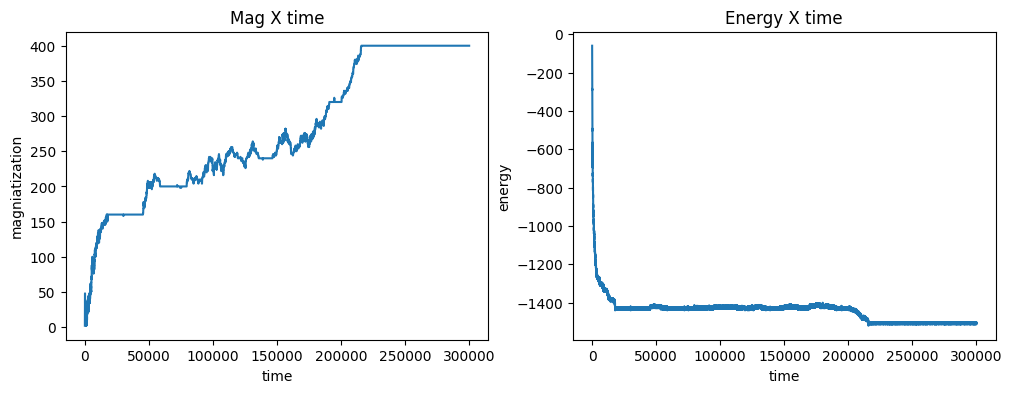

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].set_title('Mag X time')
axs[0].set_ylabel('magniatization')
axs[0].set_xlabel('time')
axs[0].plot(Mag)

axs[1].set_title('Energy X time')
axs[1].set_ylabel('energy')
axs[1].set_xlabel('time')
axs[1].plot(Eneg)

plt.show()

### Problem 4 - Global minimum of a function

Alternative **a)** Show that x value tends to 0

In [114]:
def func4(x):
    return (x**2)-np.cos(4*np.pi*x)

def gaussian():
    
    sigma = 1
    z = random()
    theta = 2*np.pi*random()
    r = sigma*np.sqrt(-2*np.log(1-z))
    
    return r*np.cos(theta)

x value = 0.0004622174125654688


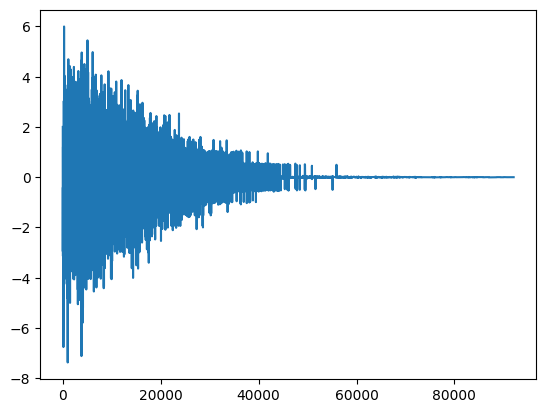

In [116]:
Tmax = 10
Tmin = 1e-3
tau = 1e4

t, x = 0, 2
T = Tmax

list = []

while T > Tmin:
    t += 1
    T = Tmax*np.exp(-t/tau)
    
    F_0 = func4(x)
    delta =  gaussian()
    x += delta
    
    df = func4(x) - F_0
    
    if df > 0:
        if random() > np.exp(-df/T):
            x -= delta
            
    list.append(x)
    
plt.plot(list)
print(f'x value = {x}')

Alterntative **b)** Show that x tend to 16, or 2 our 42 sometimes

In [119]:
Tmax = 10
Tmin = 1e-3
tau = 1e4

def func42(x):
    return np.cos(x) + np.cos(x*np.sqrt(2)) + np.cos(x*np.sqrt(3))

x value = 2.1660528467916116


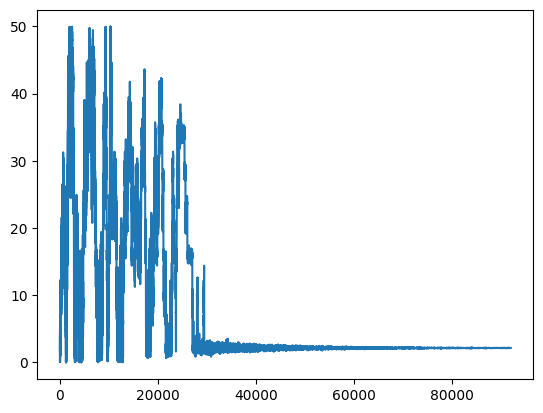

In [123]:
list2 = []
t, x = 0, 0
T = Tmax

while T > Tmin:
    t += 1
    T = Tmax*np.exp(-t/tau)
    
    F02 = func42(x)
    delta =  gaussian()
    
    while (x + delta) > 50 or (x + delta) < 0:
        delta = gaussian()
        
    x += delta
    df = func42(x) - F02 
    
    if df > 0:
        if random() > np.exp(-df/T):
            x -= delta
            
    list2.append(x)
    
plt.plot(list2)
print(f'x value = {x}')